### **References**

- [https://www.youtube.com/watch?v=5w5iUbTlpMQ](https://www.youtube.com/watch?v=5w5iUbTlpMQ)
- [https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html](https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html)
- [https://machinelearningcoban.com/2017/01/01/kmeans/](https://machinelearningcoban.com/2017/01/01/kmeans/)

### **Example**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sklearn.datasets import make_blobs

In [2]:
ex_data = pd.DataFrame({'x': [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12],
                        'y': [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]})

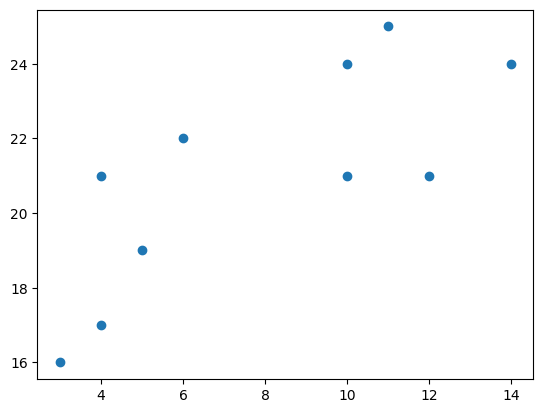

In [3]:
plt.scatter(ex_data['x'], ex_data['y'])

In [4]:
min = np.amin(ex_data)
max = np.amax(ex_data)
shape = ex_data.shape

centroids = np.random.uniform(min, max, size=(2, shape[1]))
centroids_data = pd.DataFrame({ 'x': centroids[0], 'y': centroids[1] })
print(centroids)
print(centroids_data)

[[13.05279573 13.19002894]
 [ 5.60107276 16.53767244]]
           x          y
0  13.052796   5.601073
1  13.190029  16.537672


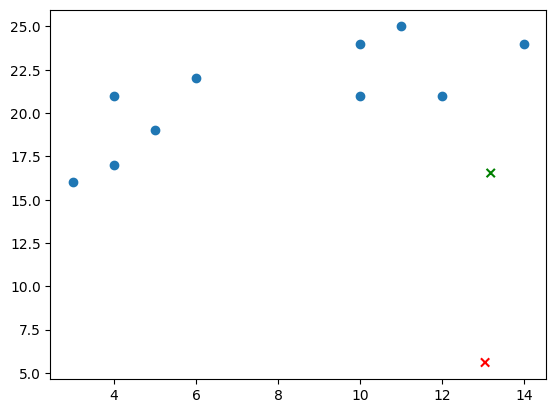

In [5]:
plt.scatter(ex_data['x'], ex_data['y'])
colors = ['r', 'g']
plt.scatter(centroids_data['x'], centroids_data['y'], c=colors, marker='x')
plt.show()

[Euclidean Distance](./mathematics/Euclidean%20Distance.md)

In [6]:
ex_data['distance_1_1st'] = ex_data.apply(lambda row: m.sqrt((centroids_data.iloc[0]['x'] - row['x'])**2 + (centroids_data.iloc[0]['y'] - row['y'])**2), axis=1)
ex_data['distance_2_1st'] = ex_data.apply(lambda row: m.sqrt((centroids_data.iloc[1]['x'] - row['x'])**2 + (centroids_data.iloc[1]['y'] - row['y'])**2), axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st
0   4  21       17.862813       10.216115
1   5  19       15.632619        8.552171
2  10  24       18.650471        8.115579
3   4  17       14.556396        9.201651
4   3  16       14.463623       10.204204
5  11  25       19.507238        8.741122
6  14  24       18.423293        7.506157
7   6  22       17.851239        9.029592
8  10  21       15.698615        5.485312
9  12  21       15.434874        4.618283


In [7]:
ex_data['labels'] = ex_data.apply(lambda row: 1 if row['distance_1_1st'] < row['distance_2_1st'] else 2, axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st  labels
0   4  21       17.862813       10.216115       2
1   5  19       15.632619        8.552171       2
2  10  24       18.650471        8.115579       2
3   4  17       14.556396        9.201651       2
4   3  16       14.463623       10.204204       2
5  11  25       19.507238        8.741122       2
6  14  24       18.423293        7.506157       2
7   6  22       17.851239        9.029592       2
8  10  21       15.698615        5.485312       2
9  12  21       15.434874        4.618283       2


In [8]:
centroid_1_1st = ex_data[ex_data['labels'] == 1]
centroid_2_1st = ex_data[ex_data['labels'] == 2]

In [9]:
centroids_data_new = pd.DataFrame({ 'x': [np.mean(centroid_1_1st['x']), np.mean(centroid_2_1st['x'])], 
                                 'y': [np.mean(centroid_1_1st['y']), np.mean(centroid_2_1st['y'])] })
print(centroids_data_new)

     x     y
0  NaN   NaN
1  7.9  21.0


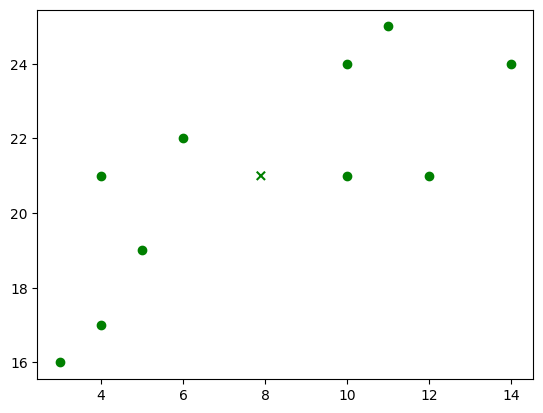

In [10]:
plt.scatter(centroid_1_1st['x'], centroid_1_1st['y'], c='r')
plt.scatter(centroid_2_1st['x'], centroid_2_1st['y'], c='g')
colors = ['r', 'g']
plt.scatter(centroids_data_new['x'], centroids_data_new['y'], c=colors, marker='x')
plt.show()

In [11]:
ex_data['distance_1_2nd'] = ex_data.apply(lambda row: m.sqrt((centroids_data_new.iloc[0]['x'] - row['x'])**2 + (centroids_data_new.iloc[0]['y'] - row['y'])**2), axis=1)
ex_data['distance_2_2nd'] = ex_data.apply(lambda row: m.sqrt((centroids_data_new.iloc[1]['x'] - row['x'])**2 + (centroids_data_new.iloc[1]['y'] - row['y'])**2), axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st  labels  distance_1_2nd  \
0   4  21       17.862813       10.216115       2             NaN   
1   5  19       15.632619        8.552171       2             NaN   
2  10  24       18.650471        8.115579       2             NaN   
3   4  17       14.556396        9.201651       2             NaN   
4   3  16       14.463623       10.204204       2             NaN   
5  11  25       19.507238        8.741122       2             NaN   
6  14  24       18.423293        7.506157       2             NaN   
7   6  22       17.851239        9.029592       2             NaN   
8  10  21       15.698615        5.485312       2             NaN   
9  12  21       15.434874        4.618283       2             NaN   

   distance_2_2nd  
0        3.900000  
1        3.522783  
2        3.661967  
3        5.586591  
4        7.000714  
5        5.060632  
6        6.797794  
7        2.147091  
8        2.100000  
9        4.100000  


In [12]:
ex_data['labels'] = ex_data.apply(lambda row: 1 if row['distance_1_2nd'] < row['distance_2_2nd'] else 2, axis=1)
print(ex_data)

    x   y  distance_1_1st  distance_2_1st  labels  distance_1_2nd  \
0   4  21       17.862813       10.216115       2             NaN   
1   5  19       15.632619        8.552171       2             NaN   
2  10  24       18.650471        8.115579       2             NaN   
3   4  17       14.556396        9.201651       2             NaN   
4   3  16       14.463623       10.204204       2             NaN   
5  11  25       19.507238        8.741122       2             NaN   
6  14  24       18.423293        7.506157       2             NaN   
7   6  22       17.851239        9.029592       2             NaN   
8  10  21       15.698615        5.485312       2             NaN   
9  12  21       15.434874        4.618283       2             NaN   

   distance_2_2nd  
0        3.900000  
1        3.522783  
2        3.661967  
3        5.586591  
4        7.000714  
5        5.060632  
6        6.797794  
7        2.147091  
8        2.100000  
9        4.100000  


In [13]:
centroid_1_2nd = ex_data[ex_data['labels'] == 1]
centroid_2_2nd = ex_data[ex_data['labels'] == 2]

In [14]:
centroids_data_new = pd.DataFrame({ 'x': [np.mean(centroid_1_2nd['x']), np.mean(centroid_2_2nd['x'])], 
                                 'y': [np.mean(centroid_1_2nd['y']), np.mean(centroid_2_2nd['y'])] })
print(centroids_data_new)

     x     y
0  NaN   NaN
1  7.9  21.0


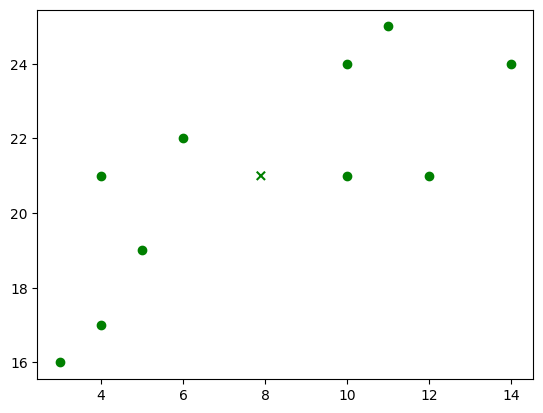

In [15]:
plt.scatter(centroid_1_2nd['x'], centroid_1_2nd['y'], c='r')
plt.scatter(centroid_2_2nd['x'], centroid_2_2nd['y'], c='g')
colors = ['r', 'g']
plt.scatter(centroids_data_new['x'], centroids_data_new['y'], c=colors, marker='x')
plt.show()